<a href="https://colab.research.google.com/github/mnsosa/resistencia-de-materiales/blob/main/ESTATICA_Y_R_DE_MATERIALES_Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías necesarias

In [ ]:
from sympy import *
import numpy as np
# Ejemplo de uso de sympy
# x, y, z = symbols('x y z')
# pprint(Integral(sqrt(1/x), x), use_unicode=True)

# Clases teóricas en youtube

Tracción - Compresión
https://www.youtube.com/playlist?list=PLXGlsyAitU7T_7dlxhRW9jxaIIHEcYwwB

Recipientes de presión
https://www.youtube.com/playlist?list=PLXGlsyAitU7QTI6gJzny2zHI2Z6lFl9ti

Estado plano de tensiones
https://www.youtube.com/playlist?list=PLXGlsyAitU7S---M0wzACs3zXw1t6tX-O

Inercia y flexión pura
https://www.youtube.com/playlist?list=PLXGlsyAitU7Rva07oRM_O3AilabidDbFl

Torsión
https://www.youtube.com/playlist?list=PLXGlsyAitU7TgsIjGxbRnC55u_qaH7XKI

Corte
https://www.youtube.com/playlist?list=PLXGlsyAitU7QZ-AbhNDWGJkRRX8L9CEGJ

Deformación por flexión
https://www.youtube.com/playlist?list=PLXGlsyAitU7QVw29GKfyunpfJNfAb3xYk


# Calculadora de inercias

In [ ]:
# distancias del GC de la parte al GC de la pieza
distancias = [0, 17.5, -17.5]

# bases de las partes rectangulares
bases = [10, 20, 20]

# alturas de las partes rectangulares
alturas = [40, 5, 5]

inercias_por_partes = []

for d, b, h in zip(distancias, bases, alturas):
    inercias_por_partes.append(b*h**3/12 + b*h*d**2)

inercia_total = sum(inercias_por_partes)

print(inercias_por_partes)
print(inercia_total)

[53333.333333333336, 30833.333333333332, 30833.333333333332]
115000.0


# TORSIÓN

## FORMULAS

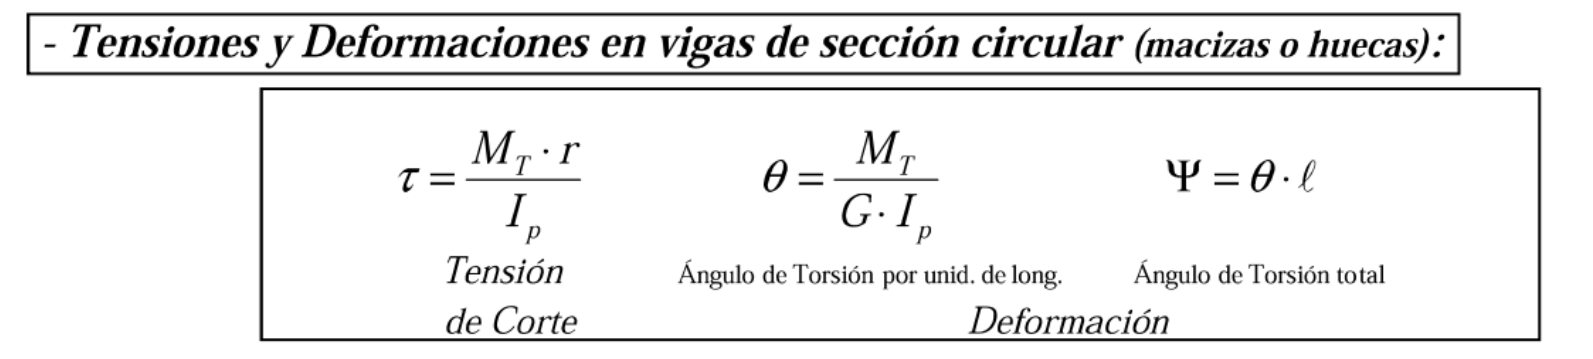

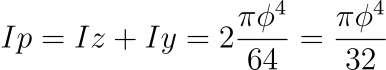

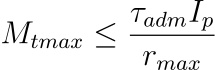

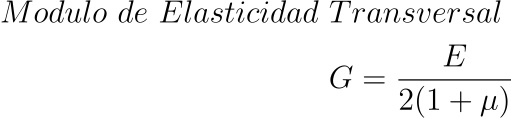

##Ejercicio tipo 1: 




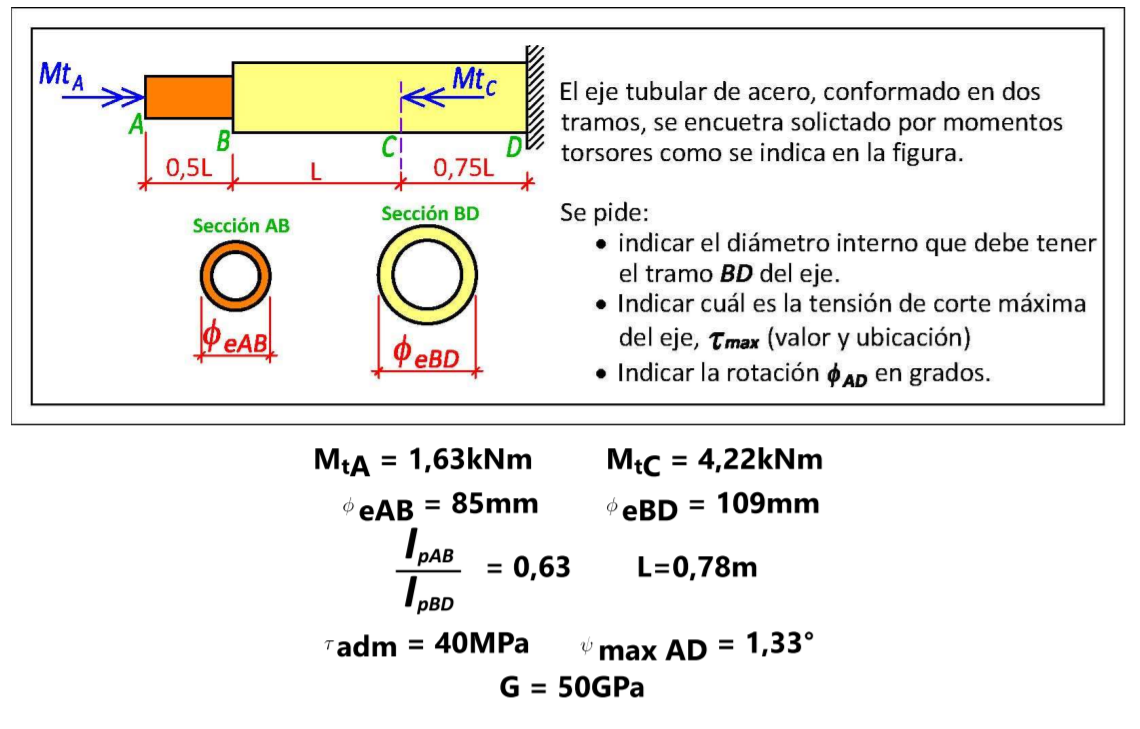

In [ ]:
# Indicar los momentos torsores, por tramos
Mt1 = 1.63 * 1000 * 1000 # N/mm2
Mtc = -4.22 * 1000 / (1000**2) # N/mm2
Mt2 = Mt1+Mtc

momentos = [Mt1, Mt1, Mt2]
momentos

[1630000.0, 1630000.0, 1629999.99578]

**RECORDAR QUE MPa = Nmm2**

### Estudios de tramos

In [ ]:
# Completar la tension (ver unidad) y 
tension_admisible = 40  # N/mm2 o MPa
radios = [85/2, 109/2., 109/2.] # en mm    

In [ ]:
# Symbols 
tau, m, r = symbols("𝜏 M r")

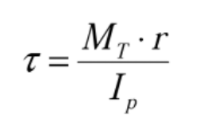

In [ ]:
# Calculo de inercias por tramo y el simbolico
inercias_polares_por_tramo = [m*r/tension_admisible for m,r in zip(momentos, radios)]

In [ ]:
for i,inercia in enumerate(inercias_polares_por_tramo):
  print(f"Inercia del tramo {i+1}")
  print(inercia)
  print("\n")


Inercia del tramo 1
1731875.0


Inercia del tramo 2
2220875.0


Inercia del tramo 3
2220874.99425025




###Inercia polar según tramo AB

Se dice que Ip_ab/Ip_bd = 0.63

In [ ]:
Ip_ab = inercias_polares_por_tramo[0]
print("Ip_ab =", Ip_ab)

Ip_ab = 1731875.0


In [ ]:
Ip_bd = Ip_ab / 0.63
print("Ip_bd =", Ip_bd)

Ip_bd = 2749007.9365079366


###Inercia polar según la deformación angular

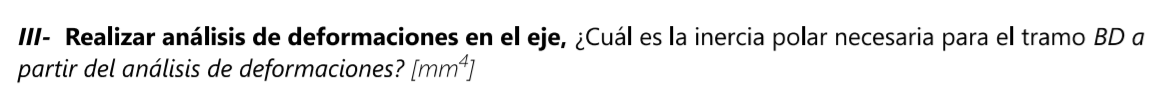

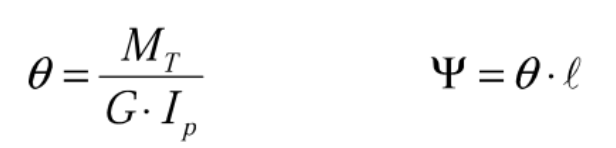

Theta: ángulo de torsión por unidad de longitud.

Psi: ángulo de torsión total en L

Se despeja Ip por las ecuaciones de arriba

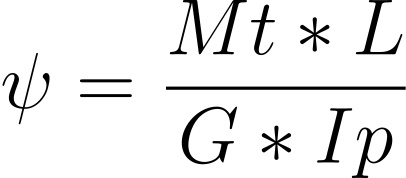


In [ ]:
# Como dato -> angulo_deg = 1.33 grados
psi_max_AD_deg = 1.33
psi_max_AD_rad = np.deg2rad(psi_max_AD_deg)
psi_max_AD_rad

0.023212879051524585

Se suman las deformaciones de los distintos segmentos. 

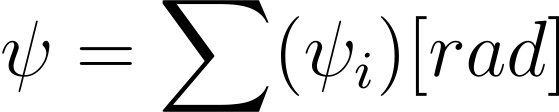

In [ ]:
# Longitudes por tramo
L = 0.78 * 1000 # en mm
longitudes_por_tramo = [0.5*L, L, 0.75*L]

In [ ]:
# Modulo de elasticidad transversal
G = 50 * 1000 # en N/mm2

Despejando la inercia:

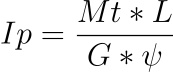

In [ ]:
momentos

[1630000.0, 1630000.0, 1629999.99578]

In [ ]:
momentos_por_tramo = [-momentos[0], -momentos[1], momentos[2]]

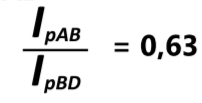

In [ ]:
# Dado por la relación de la imagen de arriba
momentos_por_tramo[0] = momentos_por_tramo[0]/0.6

In [ ]:
Ip_por_tramo_segun_psi = [M*l/(G*psi_max_AD_rad) for M, l in zip(momentos_por_tramo, longitudes_por_tramo)]
Ip_por_tramo_segun_psi

[-912855.3141971537, -1095426.3770365843, 821569.7806504292]

In [ ]:
print("RESULTADO\nIp en segmento BD =", abs(sum(Ip_por_tramo_segun_psi)))

RESULTADO
Ip en segmento BD = 1186711.9105833087


## Para dimensionar

<ol>
<li>Se saca la Ip por tensión τ</li>
<li>Se saca la Ip por deformación angular ψ</li>
<li>Se compara Ip_tensión con Ip_deformación y se elige el mayor (Ip_mayor)</li>
<li>Se despeja el diámetro interno con la Ip_mayor para lograr el dimensionado.</li>
</ol>

<center> 

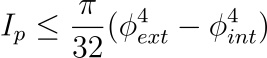

</center>


## Teoría de Bredt

Se utiliza para piezas no circulares.

Tiene en cuenta el espesor en cada tramo de la pieza.

Utiliza la superficie delimitada por la línea medio

Dice que el flujo de corte es constante en toda la sección.

Se utiliza el paredes de espesores pequeños.

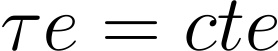

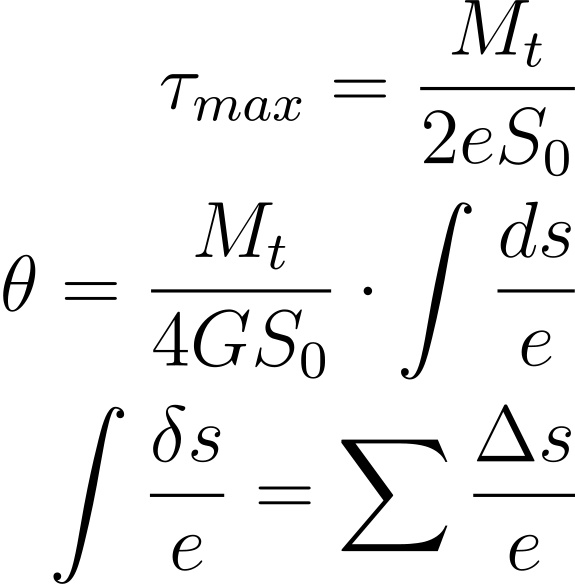

### En el caso de una figura en forma de cilindro

Si la figura es un cilindro:

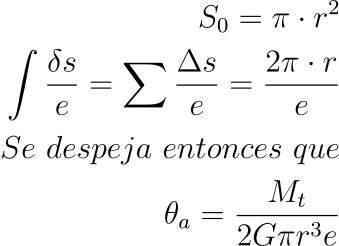

#### Torsión de Bredt

### Superficie delimitada por la línea media

Se hace la superficie interna. Se puede hacer de cualquier forma pero en la guía suelen hacer así:

In [ ]:
# largos paralelos de la figura
largo_paralelo_1 = 5.5
largo_paralelo_2 = 2.5
largo_de_ancho = 3

S0 = (largo_paralelo_1 + largo_paralelo_2) / 2 * largo_de_ancho

print("La superficie delimitada por la línea media es:", S0)

La superficie delimitada por la línea media es: 12.0


Cálculo de la torsión en el espesor más chico

In [ ]:
# espesor más chico
espesor_menor = 1
momento_torsor = 80000

# tensión máxima
tension_max = momento_torsor/(2*espesor_menor*S0)

print(f"La tensión máxima en la pared de {espesor_menor} es de {tension_max}")

La tensión máxima en la pared de 1 es de 33.333333333333336


### Esbeltez de contorno

Para sacar la sumatoria tercera, llamada esbeltez del contorno, se hace:

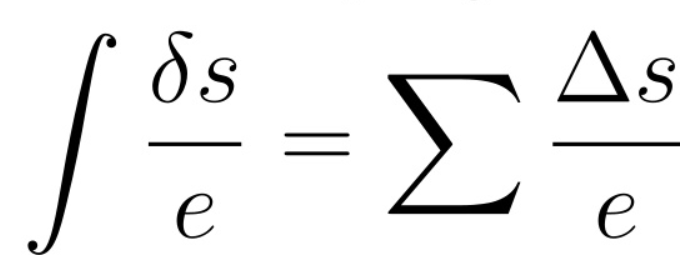

### Deformación angular por largo

In [ ]:
# unidad de distancia a usar
unidad_largo: str = "cm"

# largos de cada sección
largos = [50, 30, 30, np.sqrt(30**2 + 20**2)]
# Recordar que también hay que poner el largo
# de las piezas inclinadas.
# En el caso anterior, el último largo es de una pieza
# inclinada. Se hizo por pitágoras.

# espesores de cada seccion
espesores = [1, 2, 1, 2]

# esbeltez del contorno
esbeltez = sum([l/e for l, e in zip(largos, espesores)])

print(f"Esbeltez del contorno = {esbeltez} {unidad_largo}")

Esbeltez del contorno = 113.02775637731995 cm


In [ ]:
# El modulo de elasticidad transversal G
G = 8*10**5

theta = momento_torsor / 4 / G / S0**2 * esbeltez
print(f"El ángulo de torsión por unidad de longitud es = {theta} rad")

El ángulo de torsión por unidad de longitud es = 1.962287437106249e-06 rad


### Deformación angular total

In [ ]:
# largo L
L = 300 # en cm

psi = theta * L 

print(f"La deformación total es de {psi} cm")

La deformación total es de 0.0005886862311318748 cm


# Corte en vigas flexionadas

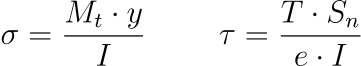

## Ejercicio complementario - Resolución

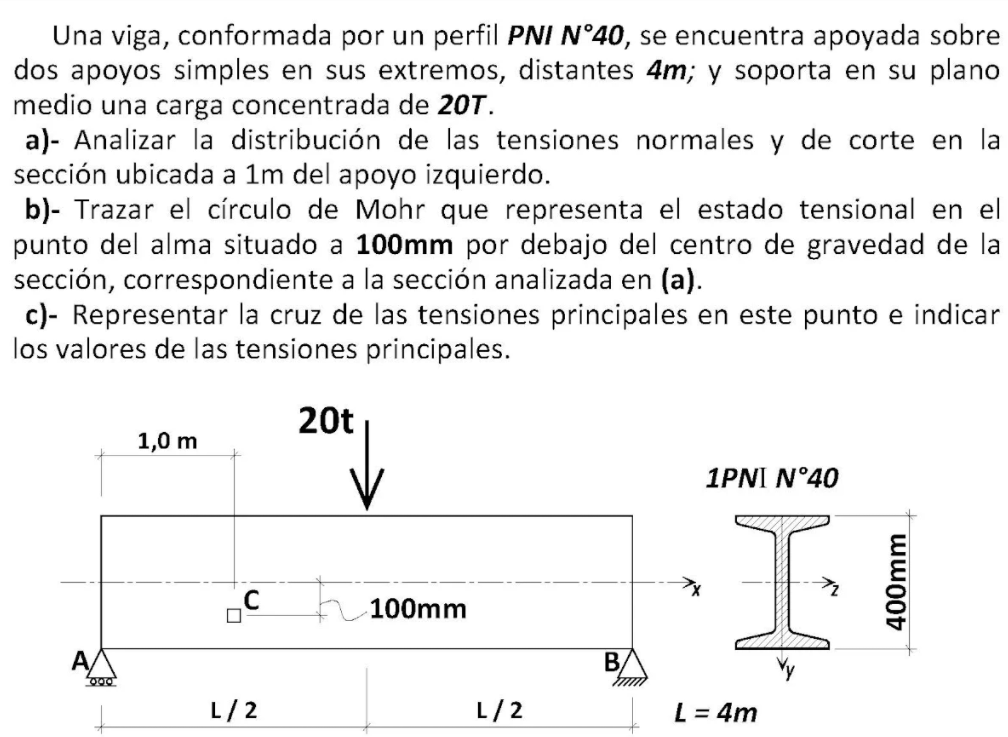

Se comienzan sacando las reacciones de los apoyos.

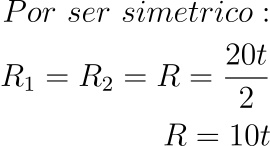

La tensión normal será

Sección 1: 10t

Sección 2: -10t

El momento máximo se dará a la mitad, donde la Normal se hace 0.

    M(x)_1 = 10*x

Valuando en 2 metros:
      
    M(2)_1 = 20t

## Calculadora de momento estático (Sn)

In [ ]:
# Area del area que estamos evaluando de la pieza
area = 0.86*6.5

# CG del area que estamos evaluando
cg_area = 1

# La altura a donde estamos evaluando el corte
altura_corte = 16.5-2

# MOMENTO ESTATICO
Sn = area * (cg_area + altura_corte) 

print("El momento estático Sn es", Sn)

El momento estático Sn es  341.0


In [ ]:
# Para sacar el corte en un punto dado entonces

# Se usa el T máximo del diagrama característico de corte
T = 750

# Base de la pieza entera
b = 11

# Altura de la pieza entera
h = 33

# Inercia
I = b*h**3/12

# Luego, tau max será 
tau_max = T*Sn/(b*I)

print(f"El tau máximo para la altura {altura_corte} es {tau_max}")

El tau máximo para la altura 14.5 es 0.7057805705439064


# Flexión deformación

In [ ]:
# Para voladizo a la mitad 

P = 66000
a = 2.2
EI = 2.5*10**7
L = 4.4 

# la deformada entonces en D es
vD = P*a**2*(L - a/3)/(2*EI)
print("La deformada en D es ", vD*1000, "mm")


La deformada en D es  23.425600000000006 mm


In [ ]:
# Para voladizo de la otra mitad
vc = lambda x: P*a/(6*EI)*x**2*(3 - x/a)

print("La deformada en C es", vc(2.2)*1000, "mm")

La deformada en C es 9.370240000000003 mm


In [ ]:
# Para carga constante
q = 30000

v_B = lambda x: 5*q*L**4/(384*EI)
print("La deformada en B es", v_B(2.2)*1000 , " mm")

La deformada en B es 5.856400000000002  mm


In [ ]:
# Para voladizo con P en la punta
b = 9 # cm
h = 27 # cm
I = b*h**3/12 
E = 80000 # kg/cm2

v_vola_A_C = lambda x, a, P: P*a/(6*E*I)*x**2*(3-x/a)

print("V en B donde P está al extremo", v_vola_A_C(x=200, a=200, P=-300))




V en B donde P está al extremo -0.6774035123372114
V en B donde P está al medio 0.8467543904215142


In [ ]:
E = 80000/10**2
b = 80
h = 240
I = b*h**3/12
a = 3000 - 600
L = 3000
x_p = 600

P = 5*2*E*I/(a**2*(L - a/3 - x_p))

print("P =", P)

P = 80.0


# Ejercicios de Parcial

## Flexión y Corte

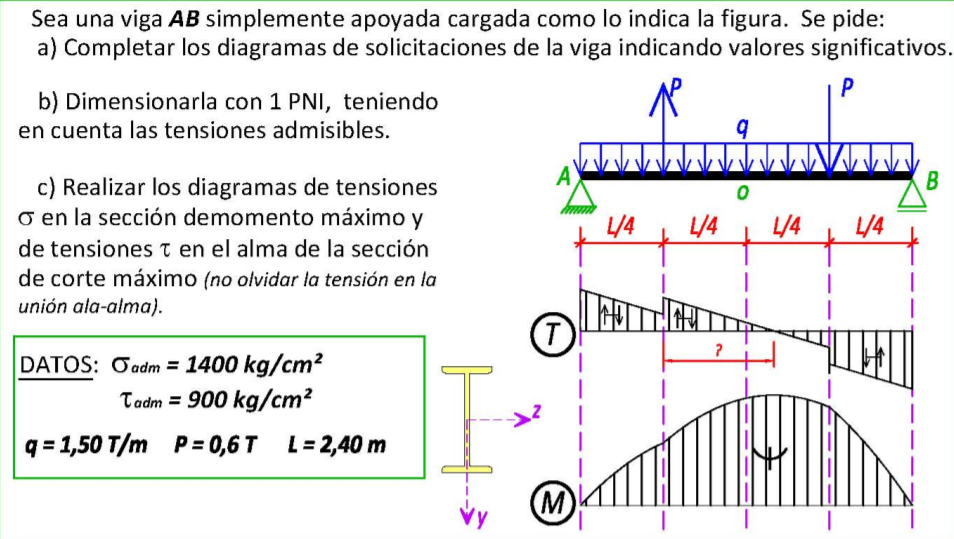

In [ ]:
# --------- CALCULO DE REACCIONES --------------
print("PLANTEO DE LA ESTÁTICA")
print(30*"-")

# Despejando de sum(momento) = 0

P = 0.6 # t
L = 2.4 # m
q = 1.5 # t/m

RB = (-P*L/4 + q*L*L/2 + P*3*L/4)/L

print("La reacción vertical en B es", RB, "m")

# Despejando de sum(f_verticales) = 0

RA = q*L - RB

print("La reacción vertical en A es", RA, "m")
# ---------------------------------------------------

# ------- Funciones de momento y tensiones ---------
T1 = lambda x: -q*x + RA
T2 = lambda x: -q*x + (T1(x) + P)

M1 = lambda x: -q*x**2/2 + RA*x
M2 = lambda x: -q*x**2/2 + (T1(L/4) + P)*x + M1(L/4)

x0 = (T1(L/4) + P)/q
Mmax = M2(x0)

print("El X del tramo 2 donde el momento es máximo es", x0, "m")
print("El momento máximo es", Mmax, "tm")
# ------------------------------------------------------

# -----------Dimensionamiento con 1 PNI ----------------
tension_adm = 1400 # kg/cm2

# Cambio de unidades de tm a kgcm
Mmax = Mmax * 1000 * 100

W = Mmax/tension_adm

print("El W deberá ser al menos de", W, "cm^2")
print("Se utiliza 1 PNI 14")
# -------------------------------------------------------

# ------- Diagrama de tensiones normales y corte con PNI 14 ----------
h = 14 # cm
b = 6.5 # cm
d = 0.57 # cm
t = 0.86 # cm
Iz = 573 # cm4 

sigma = lambda y: Mmax*y/Iz

print("El sigma máximo en la PNI 14 será de", sigma(h/2), "kg")
print("El sigma en", h/2-t ,"en la PNI 14 será de", sigma(h/2-t), "kg")

# Area del area que estamos evaluando de la pieza
# CG del area que estamos evaluando
# La altura a donde estamos evaluando el corte
# MOMENTO ESTATICO
Sn = lambda area, cg_area, altura_corte: area * (cg_area + altura_corte)

print("El momento estático Sn en altura", h-t, "es", Sn(b*t, t/2, h/2-t))

PLANTEO DE LA ESTÁTICA
------------------------------
La reacción vertical en B es 2.0999999999999996 m
La reacción vertical en A es 1.5 m
El X del tramo 2 donde el momento es máximo es 0.8000000000000002 m
El momento máximo es 1.1099999999999999 tm
El W deberá ser al menos de 79.28571428571426 cm^2
Se utiliza 1 PNI 14
El sigma máximo en la PNI 14 será de 1356.0209424083766 kg
El sigma en 6.14 en la PNI 14 será de 1189.4240837696332 kg
El momento estático Sn en altura 13.14 es 36.726299999999995


# UTILIDADES PARA ESTÁTICA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --------------- MOHR ------------------
class Mohr:
  """Calcula los valores claves del círculo de Mohr y otras funcionalidades"""
  
  sigma_alfa = None
  sigma_alfa_90 = None

  def __init__(self, sigmax, sigmay, taux):
    self.sigmax = sigmax
    self.sigmay = sigmay
    self.taux = taux

    self.centro = (self.sigmax + self.sigmay)/2
    self.R = np.sqrt(((self.sigmax-self.sigmay)/2)**2 + self.taux**2)
    self.tensiones_principales = (self.centro + self.R, self.centro - self.R)
    beta_aux = np.rad2deg(np.arctan(self.taux/(self.sigmax-self.centro)))/2

    # si el signo de beta no coincide con la direccion de taux, debe corregirse
    if np.sign(beta_aux) != np.sign(self.taux):
      # si beta es positivo, se corrige a negativo
      if np.sign(beta_aux) is 1: 
        self.beta = beta_aux - 90
      else:
      # beta es negativo pero taux positivo, se corrige a positivo
        self.beta = beta_aux + 90
    else: 
      # los signos coinciden
      self.beta = beta_aux
    

  def dibujar(self):
    theta = np.linspace(0, 2*np.pi, 100)
    r = self.R
    x1 = r*np.cos(theta) 
    x2 = r*np.sin(theta)

    fig, ax = plt.subplots(1, figsize=(8,8))
    # circulo
    ax.plot(x1 + self.centro, x2)
    
    # puntos adicionales
    punto0 = self.centro, 0
    punto1 = self.sigmax, self.taux
    punto2 = self.centro, self.R
    punto3 = self.sigmay, -self.taux
    punto4 = self.tensiones_principales[0], 0
    punto5 = self.tensiones_principales[1], 0

    puntos = [punto0, punto1, punto2, punto3, punto4, punto5]
    text_puntos = ["centro", "(sx, txy)", "tmax", "(sy, txy)", "s1", "s2"]

    # graficar y poner textos
    for p, t in zip(puntos, text_puntos):
      ax.plot(p[0], p[1], 'yo')
      plt.annotate(t,xy=p,
                 arrowprops=dict(arrowstyle='->'),
                 xytext=(p[0] + self.R*0.10, p[1] + self.R*0.10))
    # Notar que la distancia de los textos son proporcionales a R

    
    xlim_derecha = self.centro + self.R*1.3
    xlim_izquierda = self.centro - self.R*1.3

    plt.xlim([xlim_izquierda, xlim_derecha])
    plt.ylim([-self.R*1.33, self.R*1.33])
    plt.xlabel('sigma')
    plt.ylabel('tau')
    ax.set_aspect(1)
    plt.grid(linestyle='--')
    plt.title('CÍRCULO DE MOHR', fontsize=20)
    plt.show()


  def calcular_sigma_tau_alfa(self, alfa):
    # Se convierte alfa en radianes
    a = np.deg2rad(alfa)
    a_90 = np.deg2rad(alfa+90)
    sx = self.sigmax
    sy = self.sigmay
    tx = self.taux

    sigma_alfa_funcion = lambda a: (sx + sy)/2 + (sx - sy)/2*np.cos(2*a) + tx*np.sin(2*a)

    self.sigma_alfa = sigma_alfa_funcion(a)
    self.sigma_alfa_90 = sigma_alfa_funcion(a_90)
                                            
    self.tau_alfa = -(sx - sy)/2*np.sin(2*a) + tx*np.cos(2*a)

    print("El sigma alfa es", self.sigma_alfa)
    print("El sigma alfa + 90 es", self.sigma_alfa_90)
    print("El tau alfa es", self.tau_alfa)
    print("\nComprobación... ")
    print(f"{self.sigma_alfa + self.sigma_alfa_90} = {self.sigmax + self.sigmay}")
  

  def resultados(self):
    print("El centro (normal donde corte es máximo) es", self.centro)
    print("El radio (corte máximo) es", self.R)
    print("Las tensiones principales son (sig1, sig2) =", self.tensiones_principales)
    print("El beta es", self.beta, "grados")
    if self.sigma_alfa != None: 
      print("\nSigma alfa es", self.sigma_alfa)
      print("Sigma alfa + 90 es", self.sigma_alfa_90)
# ---------------  ------------------

# --------------- CORTE ------------------

# class inercia:

# class corte:

#   def __init__(self):
#     pass

#   def Sn(area, cg_area, altura_corte): 
#     """ Printea y devuelve el momento estatico Sn 
#     Area del area que estamos evaluando de la pieza
#     CG del area que estamos evaluando
#     La altura a donde estamos evaluando el corte
#     """
#     # MOMENTO ESTATICO
#     Sn = area * (cg_area + altura_corte) 
#     print("El momento estático Sn es", Sn)
#     return Sn

#   def corte_punto_dado(self, altura_corte, Tmax, b, h)
#     """ Para sacar el corte en un punto dado entonces
#     # Se usa el T máximo del diagrama característico de corte
#     # Base de la pieza entera
#     # Altura de la pieza entera
#     """
#     # Inercia
#     I = b*h**3/12

#     # Luego, tau max será 
#     tau_max = T*Sn/(b*I)
#     print(f"El tau máximo para la altura {altura_corte} es {tau_max}")

## Problema de Estado Plano (Mohr)

El centro (normal donde corte es máximo) es -300.0
El radio (corte máximo) es 360.5551275463989
Las tensiones principales son (sig1, sig2) = (60.55512754639892, -660.5551275463989)
El beta es 61.84503376298989 grados
El sigma alfa es 0.0
El sigma alfa + 90 es -600.0
El tau alfa es 200.00000000000003

Comprobación... 
-600.0 = -600


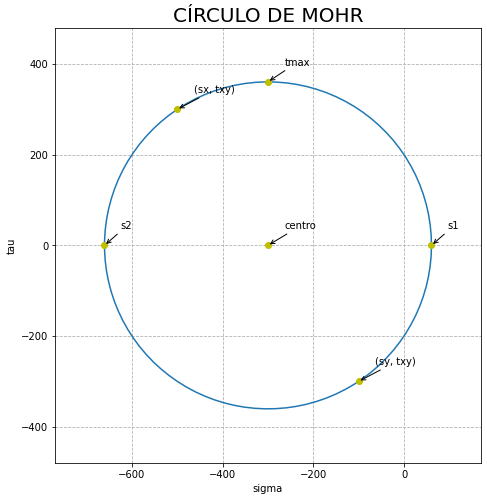

In [ ]:
# DATOS
sigmax = -500 # si flecha apunta hacia el cuadrado es (-)
sigmay = -100 # lo mismo del sentido horario
taux = 300

circulo = Mohr(sigmax, sigmay, taux)
circulo.resultados()
circulo.calcular_sigma_tau_alfa(45)
circulo.dibujar()

El centro es 30.0
El radio es 72.80109889280519
Las tensiones principales son (sig1, sig2) = (102.80109889280519, -42.801098892805186)
El beta es 7.972697950461427 grados
El sigma alfa es 61.851527496929286
El sigma alfa + 90 es -1.8515274969292825
El tau alfa es -65.46357915751597

Comprobación... 
60.0 = 60


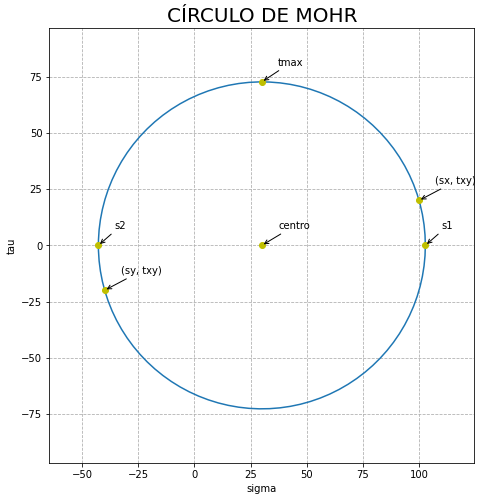

In [ ]:
circulo2 = Mohr(100, -40, 20)
circulo2.resultados()
circulo2.calcular_sigma_tau_alfa(40)
circulo2.dibujar()

# Intentando generalizar ESTATICA

In [ ]:
t, m, XRB, XRA = symbols('t m RB RA')

P = 0.6 # t
L = 2.4 # m
q = 1.5 # tm

sumMomento = solve(-P*L/4 + q*L*L/2 + P*3/4*L - XRB*L)
RB = sumMomento[0]
print("RB =", RB)

sumFy = solve(XRA - q*L + RB)
RA = sumFy[0]
print("RA =", RA)

RB = 2.10000000000000
RA = 1.50000000000000


Mmax = -0.4800000804662705


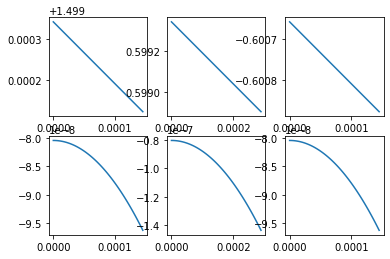

In [ ]:
q_tramo = [-q, -q, -q]
Fv_tramo = [RA, P, -P]
M_tramo = [0, 0, 0]
L_tramo = [L/4, L/2, L/4]

T_ant = lambda x: 0
T_funciones = []

M_ant = lambda x: 0
M_funciones = []

# Armado de las funciones
for i in range(len(q_tramo)):
  K = T_ant(L_tramo[i])
  Ti = lambda x: x*q_tramo[i] + Fv_tramo[i] + K
  T_funciones.append(Ti)
  T_ant = Ti

  K_M = M_ant(L_tramo[i])
  Mi = lambda x: q_tramo[i]*x**2/2 + M_tramo[i] + K_M
  M_funciones.append(Mi)
  M_ant = Mi

n = [np.arange(0, L, L/100) for L in L_tramo]

fig, axs = plt.subplots(2, len(q_tramo))

for i in range(len(T_funciones)):
  axs[0, i].plot(n[i], T_funciones[i](n[i]))
  
for i in range(len(M_funciones)):
  axs[1, i].plot(n[i], M_funciones[i](n[i]))

  
print("Mmax =", M_funciones[1](0.8))

plt.show()

In [ ]:
f_test = []

for i in range(4):
  f_test.append(lambda x: x*i)

for i in range(4):
  print(f_test[i](10))

0
10
20
30


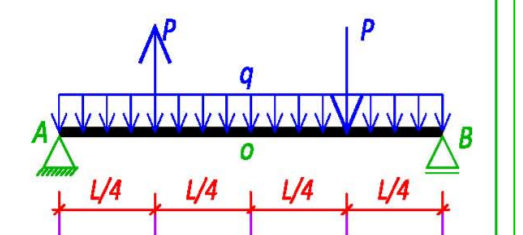

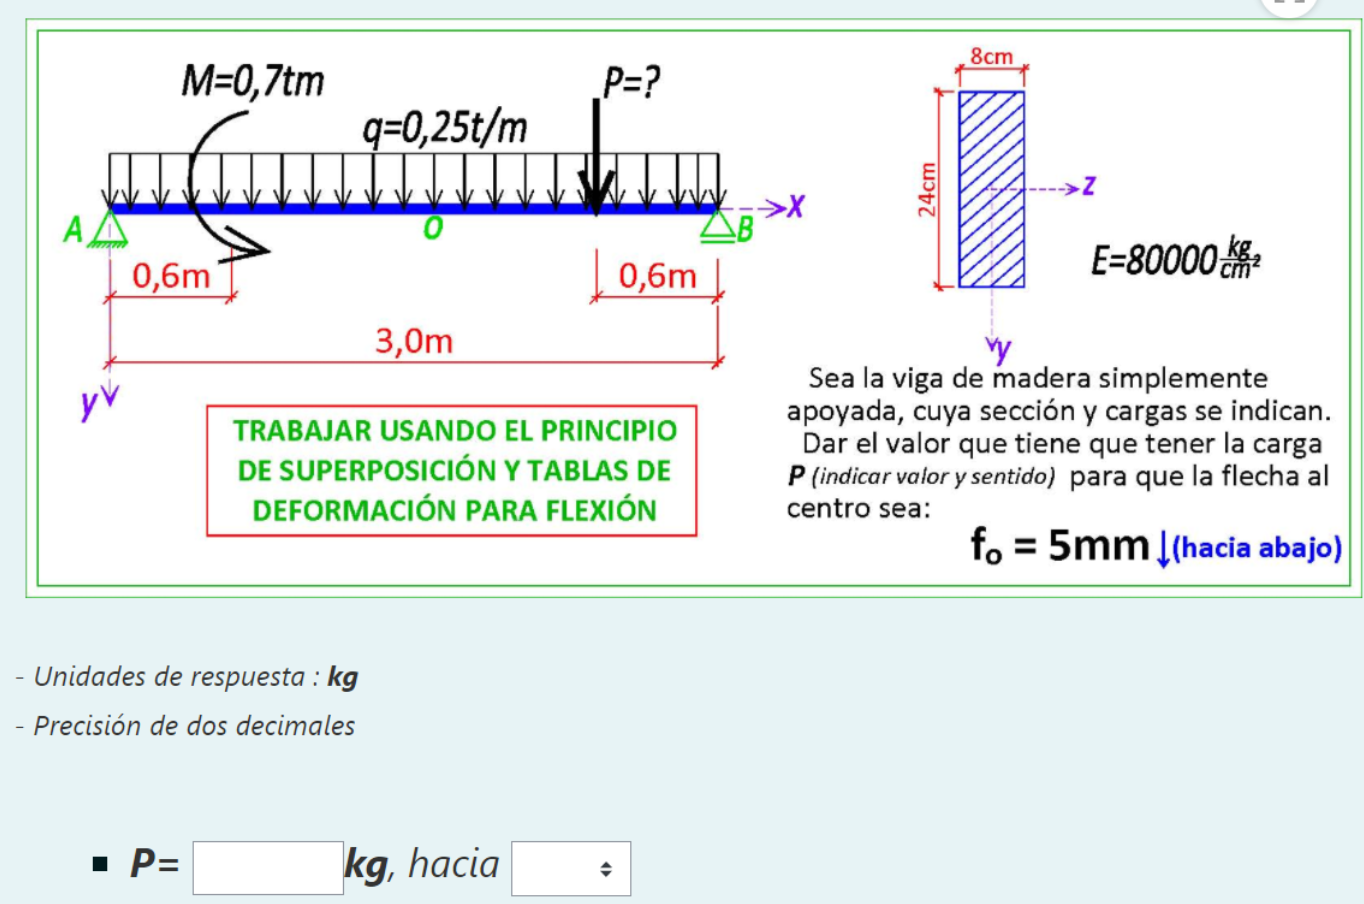

In [ ]:
q = 2.5
M = 70000
L = 300
a = 60
b = 60
x_prima = L-b
base = 8
altura = 24 
I = base*altura**3/12
E = 80000


P = symbols("P")

foq = 5*q*L**4/(384*E*I) 
foP = P*b*(3*L**2 - 4*b**2)/(48*E*I) 
foM = M*L*x_prima/(6*E*I)*(1 - 3*a**2/L**2 - x_prima**2/L**2)

resultado = solve(foq + foP + foM - 0.5)

print("foq =", foq)
print("foM =", foM)
print("Valor de P =", resultado[0])
print("foP =", resultado[0]*b*(3*L**2 - 4*b**2)/(48*E*I))

foq = 0.35762786865234375
foM = 0.2734375
Valor de P = -302.447183098592
foP = -0.131065368652344
